<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [50]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [14]:
# Read CSV
house_csv = "../DATA/Sacramento_transactions.csv"

house = pd.read_csv(house_csv, header = 0)
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### 1.1 Check for null values

In [15]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [33]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     814 non-null    object 
 1   city       814 non-null    object 
 2   zip        814 non-null    int64  
 3   state      814 non-null    object 
 4   beds       814 non-null    int64  
 5   baths      814 non-null    int64  
 6   sq__ft     814 non-null    int64  
 7   type       814 non-null    object 
 8   sale_date  814 non-null    object 
 9   price      814 non-null    int64  
 10  latitude   814 non-null    float64
 11  longitude  814 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


No null values

#### 1.2 Describe numerical values 

In [32]:
house.describe(include = 'all')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,814,814,814.0000,814,814.000000,814.000000,814.000000,814,814,814.000000,814.000000,814.000000
unique,811,36,NaN,1,NaN,NaN,NaN,3,5,NaN,NaN,NaN
top,4734 14TH AVE,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Fri May 16 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,424,NaN,814,NaN,NaN,NaN,759,216,NaN,NaN,NaN
mean,NaN,NaN,95761.4914,NaN,3.244472,1.960688,1591.146192,NaN,NaN,229448.369779,38.577044,-121.378687
std,NaN,NaN,85.3440,NaN,0.852137,0.669804,663.841930,NaN,NaN,119825.576060,0.126315,0.119736
min,NaN,NaN,95603.0000,NaN,1.000000,1.000000,484.000000,NaN,NaN,2000.000000,38.241514,-121.550527
25%,NaN,NaN,95670.0000,NaN,3.000000,2.000000,1144.000000,NaN,NaN,148750.000000,38.473885,-121.451501
50%,NaN,NaN,95820.0000,NaN,3.000000,2.000000,1418.500000,NaN,NaN,207986.500000,38.591720,-121.405456
75%,NaN,NaN,95828.0000,NaN,4.000000,2.000000,1851.000000,NaN,NaN,284973.250000,38.674705,-121.325844


-Curious that we have houses that are zero sq_ft, beds and baths. Will need to investigate further  
-Housing prices vary between  1k to 884k, with a mean of 234k, and median of 213k  
-Housing sizes vary from 0 to 5822 sqft, with a mean of 1318 sqft

In [23]:
house[house['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


At 171 rows, this makes up 18% of all observations. Given that housing prices tend to have a dependency on the overall size of the house, we should drop these columns

In [30]:
delete = house[house['sq__ft'] == 0].index

house.drop(delete, inplace=True)
print(house.head())
print(house.shape)

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  
(814, 12)


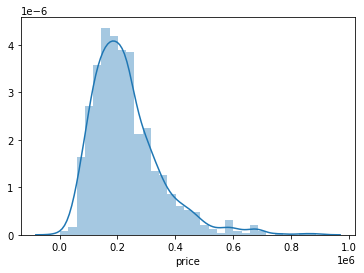

In [31]:
sns.distplot(house['price'])

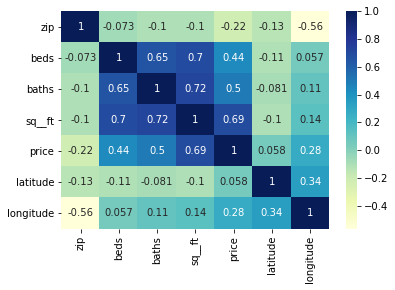

In [40]:
#correlation between variables
sns.heatmap(house.corr(), annot=True, cmap="YlGnBu")
plt.show()                                 

Nothing significant of note for correlation aside from the fact the number of beds and bath have a high positive correlation

#### Check categorical unique values for any further anomalies

In [35]:
print(house['street'].unique())
print(house['city'].unique())
print(house['type'].unique())


['3526 HIGH ST' '51 OMAHA CT' '2796 BRANCH ST' '2805 JANETTE WAY'
 '6001 MCMAHON DR' '5828 PEPPERMILL CT' '6048 OGDEN NASH WAY'
 '2561 19TH AVE' '11150 TRINITY RIVER DR Unit 114' '7325 10TH ST'
 '645 MORRISON AVE' '4085 FAWN CIR' '2930 LA ROSA RD' '2113 KIRK WAY'
 '4533 LOCH HAVEN WAY' '7340 HAMDEN PL' '6715 6TH ST'
 '6236 LONGFORD DR Unit 1' '250 PERALTA AVE' '113 LEEWILL AVE'
 '6118 STONEHAND AVE' '4882 BANDALIN WAY' '7511 OAKVALE CT' '9 PASTURE CT'
 '3729 BAINBRIDGE DR' '3828 BLACKFOOT WAY' '4108 NORTON WAY'
 '1469 JANRICK AVE' '9861 CULP WAY' '7825 CREEK VALLEY CIR'
 '5201 LAGUNA OAKS DR Unit 140' '6768 MEDORA DR' '3100 EXPLORER DR'
 '7944 DOMINION WAY' '5201 LAGUNA OAKS DR Unit 162' '3920 SHINING STAR DR'
 '5031 CORVAIR ST' '7661 NIXOS WAY' '7044 CARTHY WAY' '2442 LARKSPUR LN'
 '4800 WESTLAKE PKWY Unit 2109' '2178 63RD AVE' '8718 ELK WAY'
 '5708 RIDGEPOINT DR' '7315 KOALA CT' '2622 ERIN DR' '8421 SUNBLAZE WAY'
 '7420 ALIX PKWY' '3820 NATOMA WAY' '4431 GREEN TREE DR' '9417 SARA ST'

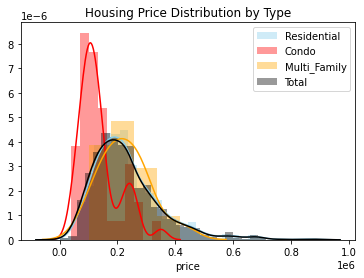

In [42]:
house_res = house[house['type'] == 'Residential']
house_con = house[house['type'] == 'Condo']
house_mult = house[house['type'] == 'Multi-Family']


sns.distplot( house_res["price"] , color="skyblue", label="Residential")
sns.distplot( house_con["price"] , color="red", label="Condo")
sns.distplot( house_mult["price"] , color="orange", label="Multi_Family")
sns.distplot( house['price'], color ="black", label = 'Total')
plt.title('Housing Price Distribution by Type')
plt.legend()


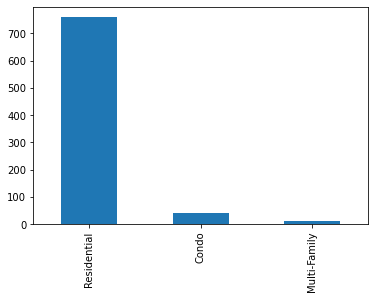

In [67]:
house['type'].value_counts().plot(kind='bar')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [39]:
# ANSWER
print ('price')

price


#### 2.2 List all possible variables which might be Predictor variable.

-Sqft  
-beds  
-baths  
-zip

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

-Choosing sq_ft as it has the highest correlation among all other variables relating to price

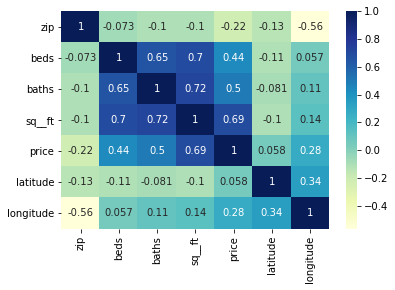

In [62]:
# ANSWER
sns.heatmap(house.corr(), annot=True, cmap="YlGnBu")
plt.show()                                 

#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

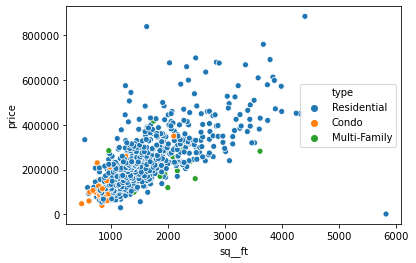

In [49]:
# ANSWER
sns.scatterplot(x='sq__ft', y='price', hue='type',
                     data=house)



#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [0]:
# ANSWER

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [0]:
# ANSWER


##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [0]:
# ANSWER

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [0]:
# ANSWER
beta_0 = house['price'].mean()

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [52]:
# ANSWER
X = house['sq__ft'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = house['price'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

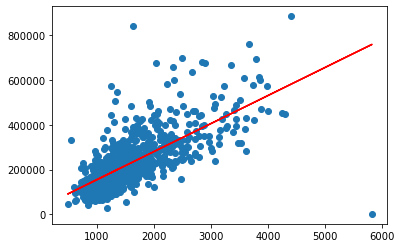

In [53]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [68]:
# ANSWER
res = abs(Y - Y_pred)
res

array([[7.56696167e+04],
       [1.08126274e+05],
       [6.10029573e+04],
       [6.75880805e+04],
       [4.81081738e+04],
       [8.07825319e+04],
       [7.75546352e+04],
       [8.65884387e+04],
       [5.31343478e+04],
       [7.47717276e+04],
       [4.37234203e+04],
       [8.53646852e+04],
       [3.24221938e+04],
       [5.04294503e+04],
       [4.94318833e+04],
       [6.15061298e+04],
       [2.26303486e+04],
       [1.35077408e+04],
       [1.61620720e+04],
       [7.83741898e+04],
       [4.82026660e+04],
       [7.39413447e+04],
       [6.24790773e+04],
       [1.06582229e+05],
       [1.80306884e+04],
       [3.98061714e+04],
       [2.35131105e+04],
       [4.13278825e+04],
       [7.18093855e+04],
       [5.44808092e+04],
       [2.73105635e+04],
       [3.99050265e+04],
       [6.65093855e+04],
       [3.12022330e+04],
       [1.93105635e+04],
       [6.15176120e+04],
       [1.83868725e+04],
       [6.57793023e+04],
       [2.41157276e+04],
       [2.46248363e+04],


##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [71]:
# ANSWER
ss_tot = np.sum(np.square(Y - Y.mean()))

ss_res = np.sum(np.square(Y - Y_pred))


r_squared = 1 - (ss_res/ss_tot)
r_squared

0.4812307133326901

##### 2.5.G [BONUS] Draw Plot of Predicted Line

In [0]:
# ANSWER

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

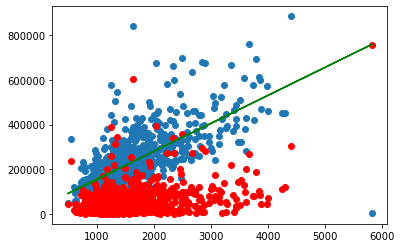

In [70]:
# ANSWER
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='green')
plt.scatter(X, res, color='red')
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [65]:
# ANSWER



ValueError: Expected 2D array, got scalar array instead:
array=1204.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



